In [1]:
%config IPCompleter.greedy=True

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

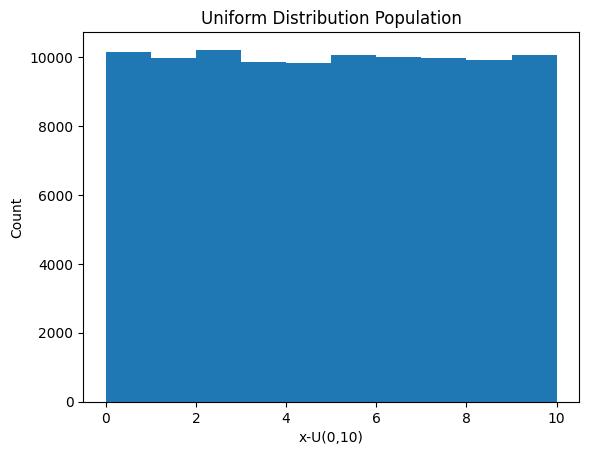

In [3]:
from scipy .stats import uniform

np.random.seed(1)
uniform_pop= uniform.rvs(0,10,100000)

plt.hist(uniform_pop)
plt.title("Uniform Distribution Population")
plt.xlabel("x-U(0,10)")
plt.ylabel("Count")
plt.show()


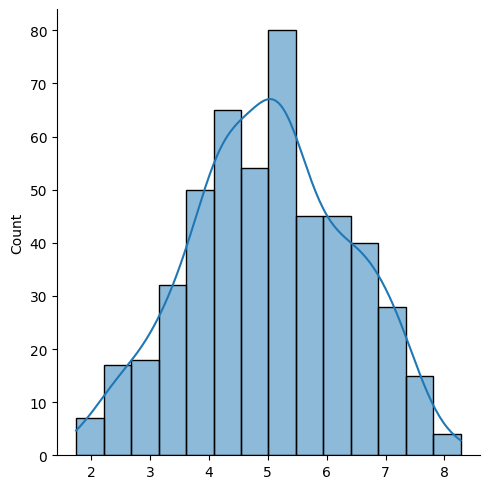

In [4]:
np.random.seed(1)
n=5
sample_means=[]
for j in range(500):
    sample= np.random.choice(uniform_pop, size=n)
    sample_mean=np.mean(sample)
    sample_means.append(sample_mean)
sns.displot(sample_means, kde=True)

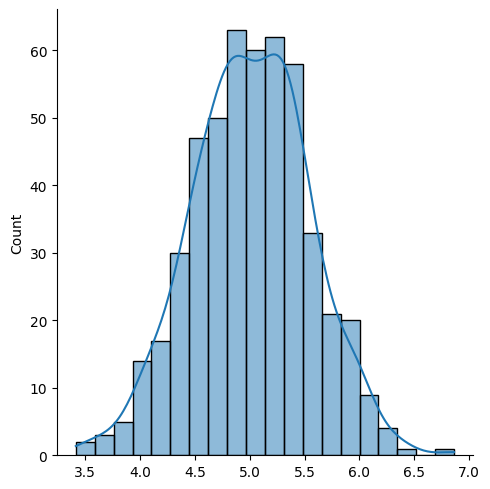

In [5]:
np.random.seed(1)
n=30
sample_means=[]
for j in range(500):
    sample= np.random.choice(uniform_pop, size=n)
    sample_mean=np.mean(sample)
    sample_means.append(sample_mean)
sns.displot(sample_means, kde=True)

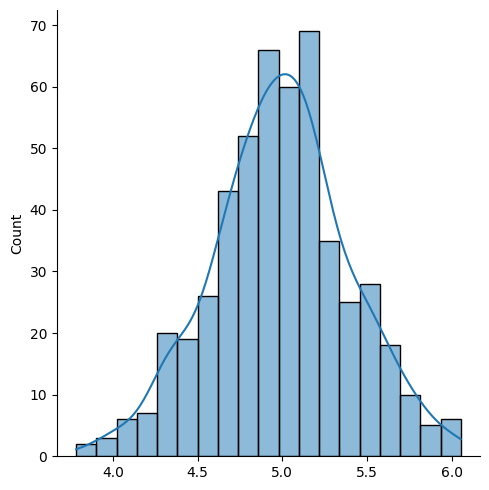

In [10]:
np.random.seed(1)
n=50
sample_means=[]
for j in range(500):
    sample= np.random.choice(uniform_pop, size=n)
    sample_mean=np.mean(sample)
    sample_means.append(sample_mean)
sns.displot(sample_means, kde=True)

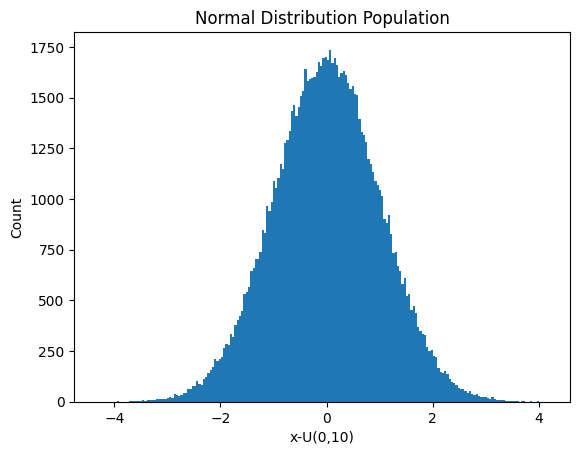

In [16]:
from scipy.stats import norm

np.random.seed(1)
normal_pop= norm.rvs(0,1,size=100000)

plt.hist(normal_pop, 200)
plt.title("Normal Distribution Population")
plt.xlabel("x-U(0,10)")
plt.ylabel("Count")
plt.show()


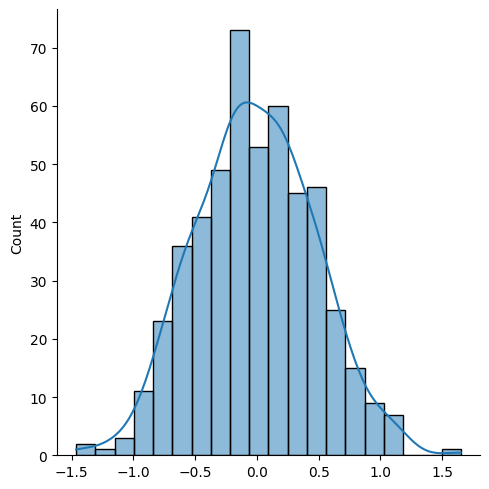

In [18]:
np.random.seed(1)
n=5
sample_means=[]
for j in range(500):
    sample= np.random.choice(normal_pop, size=n)
    sample_mean=np.mean(sample)
    sample_means.append(sample_mean)
sns.displot(sample_means, kde=True)

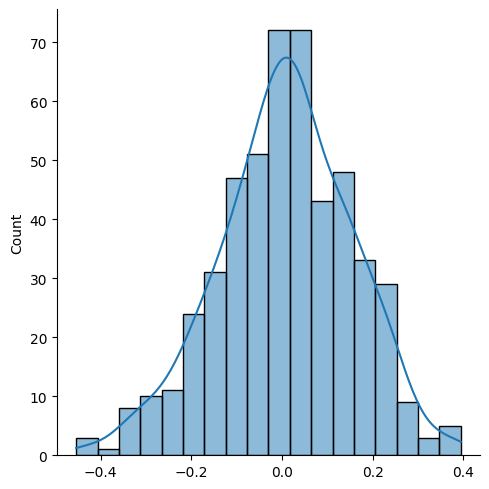

In [19]:
np.random.seed(1)
n=50
sample_means=[]
for j in range(500):
    sample= np.random.choice(normal_pop, size=n)
    sample_mean=np.mean(sample)
    sample_means.append(sample_mean)
sns.displot(sample_means, kde=True)

# Point Estimation

In [9]:
sample =np.array ([120,55,60,10,8,12,150])
#mean of sample
x_bar= np.mean(sample)
x_bar

59.285714285714285

In [12]:
from scipy.stats import norm

x_bar, sigma = 110,7

n=50
np.round(norm.interval(0.95,loc=x_bar,scale=sigma/np.sqrt(n)),2)

array([108.06, 111.94])

In [19]:
from scipy.stats import t

x_bar,sigma =110,7
n= 50
k= n-1


#np.round(norm.interval(0.95,df=k, loc=x_bar, scale=sigma/np.sqrt(n)),2)
np.round(t.interval(0.95,df=k, loc=x_bar,scale=sigma/np.sqrt(n)),2)

array([108.01, 111.99])

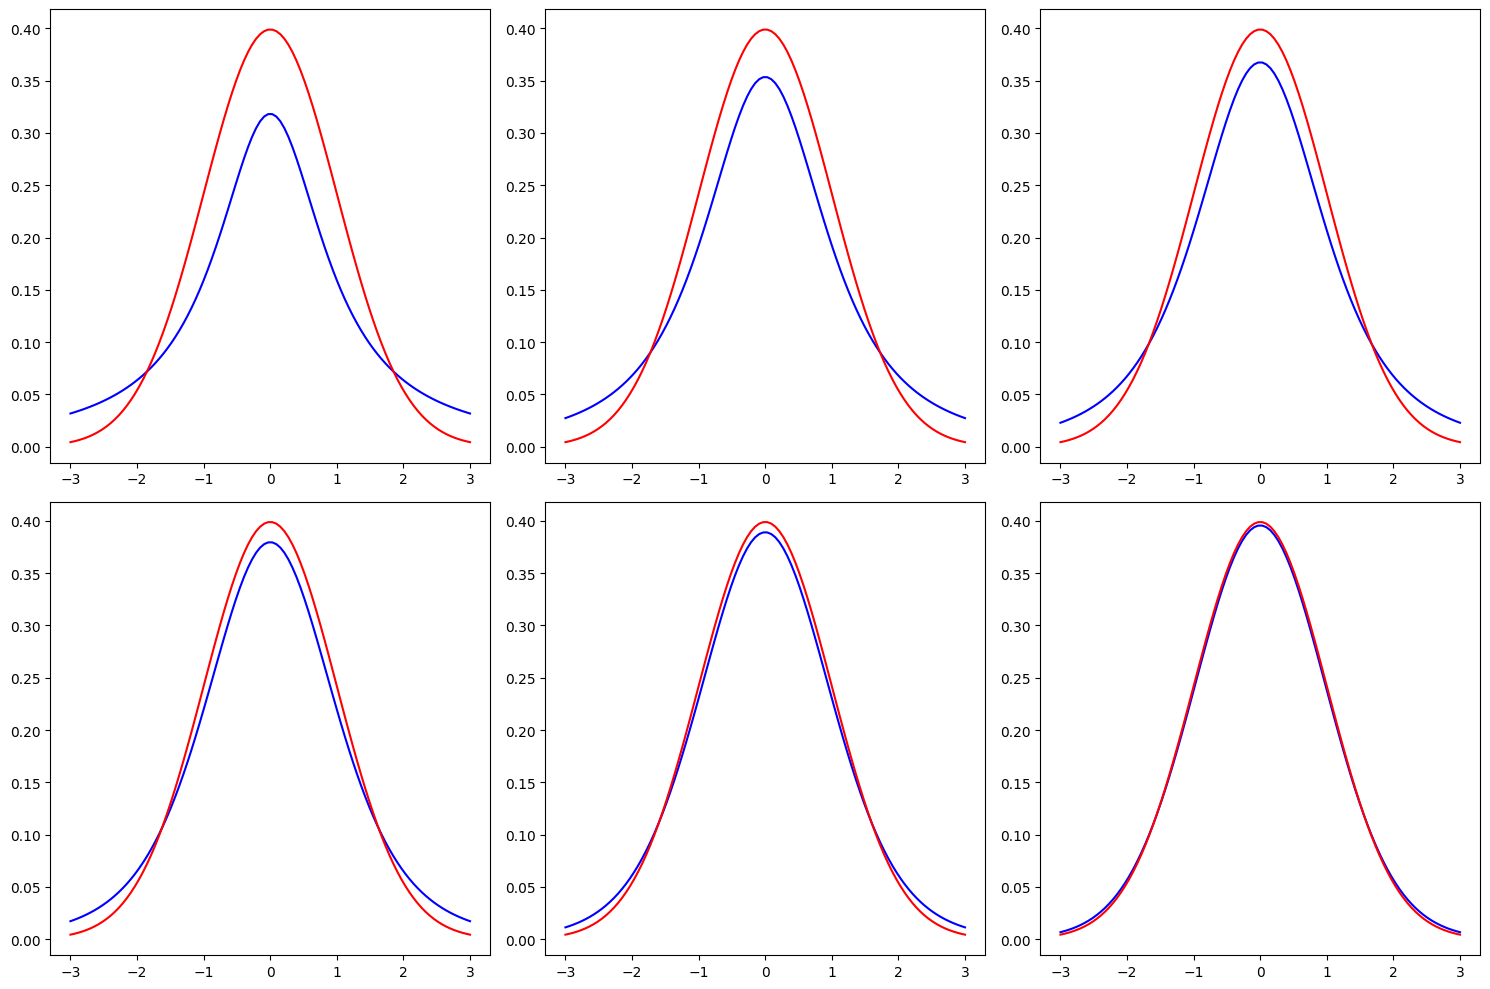

In [23]:
x=np.linspace(-3,3,100)

fig, axes = plt.subplots(2,3,sharex=False, sharey=False, figsize=(15,10))
axes=axes.ravel()
for i,k in zip(range(6),[1,2,3,5,10,30]):
    ax= axes[i]
    ax.plot(x, t.pdf(x,df=k), color='blue', label='t dist')
    ax.plot(x, norm.pdf(x), color='red', label='norm dist')
plt.tight_layout()    

In [24]:
mu, sigma =5,1.3
x_bar = 5.25
n=45

StdDeviationOfmeansOfSamples =  (sigma/np.sqrt(n)) 
test_stats=(x_bar - mu)/StdDeviationOfmeansOfSamples

test_stats

1.2900392177883402

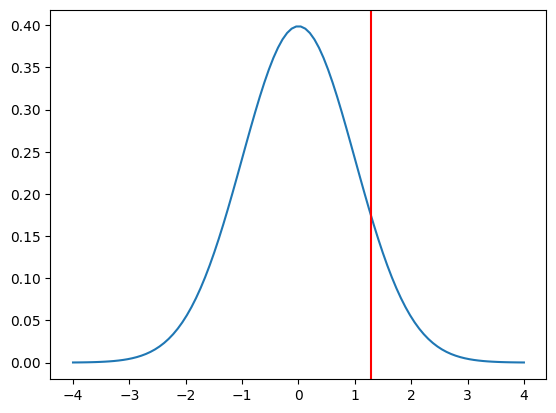

In [29]:
x=  np.linspace(-4,4,100)
plt.plot(x, norm.pdf(x,0,1))
plt.axvline(x=test_stats,c='r')
plt.show()

In [30]:
1-norm.cdf(test_stats)

0.09851852092578695

In [31]:
critical_value = norm.ppf(1-.05)
critical_value

1.6448536269514722

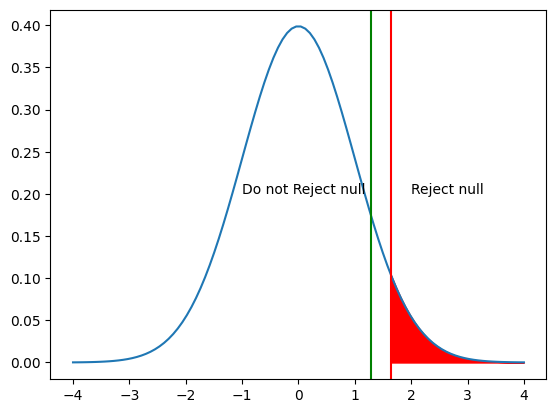

In [38]:
x=np.linspace(-4,4,100)
plt.plot(x, norm.pdf(x,0,1))
plt.axvline(x=test_stats,c='g')
plt.axvline(x=critical_value,c='r')
x1= np.linspace(critical_value,4,50)
plt.fill_between(x1, norm.pdf(x1,0,1), color='r')
plt.annotate ('Reject null', (2,0.20))
plt.annotate('Do not Reject null', (-1,0.20))
plt.show()

In [44]:
mu,sigma = 600, 50
x_bar = 580
n= 36
standardError = sigma/np.sqrt(36)
print(standardError)
bottleStats= (x_bar-mu)/standardError
print(bottleStats)

8.333333333333334
-2.4


In [46]:
criticalValueHigh = norm.ppf(1-(0.05)/2)
criticalValueLow = norm.ppf(0.05/2)
print(criticalValueHigh)
print(criticalValueLow)

1.959963984540054
-1.9599639845400545


In [ ]:
x=np.linspace(-4,4,100)
plt.plot(x, norm.pdf(x,0,1,))
plt.avline(x=criticalValueHigh,c="r")
plt.avline(x=criticalValuelow,c="r")


In [ ]:
import scipy.stats import ttest_1samp


In [60]:
from scipy.stats import chi2_contingency
df= pd.DataFrame ({'F':[53.8, 54.4, 51.2, 52.5, 61.0, 50.6, 51.6, 70.0], 'M' :[72.5, 80.3, 71.3, 67.7, 66.2, 73.4, 61.3, 76.8]}, index= ["F", "M"])





ValueError: Length of values (8) does not match length of index (2)

In [51]:
df

Promoted  Non Promoted
Company A        15             9
Company B        16            15

In [53]:
chi2, pval, dof, exp_freq= chi2_contingency(df, correction=False) 

In [54]:
pval

0.41943105261448455

In [55]:
pval>0.05

True

In [61]:
import scipy.stats as stats

# Sample statistics
sample_mean = 45000  # Sample mean
sample_std = 4000    # Sample standard deviation
sample_size = 250    # Sample size

# Confidence level
confidence_level = 0.95

# Calculate the critical value (z*) for a 95% confidence interval
critical_value = stats.norm.ppf((1 + confidence_level) / 2)

# Calculate the standard error
standard_error = sample_std / (sample_size**0.5)

# Calculate the margin of error
margin_of_error = critical_value * standard_error

# Calculate the confidence interval
lower_limit = sample_mean - margin_of_error
upper_limit = sample_mean + margin_of_error

# Print the results
print(f"95% Confidence Interval: £{lower_limit:.2f} to £{upper_limit:.2f}")


95% Confidence Interval: £44504.16 to £45495.84


In [62]:
import scipy.stats as stats

# Sample statistics
sample_mean = 14     # Sample mean
sample_std = 3       # Sample standard deviation
sample_size = 30    # Sample size

# Confidence level
confidence_level = 0.95

# Calculate the critical value (t*) for a 95% confidence interval
degrees_of_freedom = sample_size - 1
critical_value = stats.t.ppf((1 + confidence_level) / 2, df=degrees_of_freedom)

# Calculate the standard error
standard_error = sample_std / (sample_size**0.5)

# Calculate the margin of error
margin_of_error = critical_value * standard_error

# Calculate the confidence interval
lower_limit = sample_mean - margin_of_error
upper_limit = sample_mean + margin_of_error

# Print the results
print(f"95% Confidence Interval: {lower_limit:.2f} kgs to {upper_limit:.2f} kgs")


95% Confidence Interval: 12.88 kgs to 15.12 kgs


In [63]:
margin_of_error

1.1202184102742996

In [64]:
Weight_Female = [ 53.8, 54.4, 51.2, 52.5, 61.0, 50.6, 51.6, 70.0]
Weight_Male = [ 72.5, 80.3, 71.3, 67.7, 66.2, 73.4, 61.3, 76.8]

In [65]:
t_statistic, p_value = stats.ttest_ind(Weight_Female,Weight_Male)

In [66]:
p_value
#P Value 0.00024

#In this example, p value is 0.00024 and it is LESS than 5% level of significance

#So the statistical decision is to REJECT the null hypothesis at 5% level of significance.

0.00024034957515992796

In [70]:
mu, sigma= 32.2,3.6
n=1
x_bar=30
z=(x_bar-mu)/(sigma)

In [71]:
z

-0.6111111111111119

In [73]:
np.round(norm.interval(0.95,loc=x_bar,scale=sigma/np.sqrt(n)),2)

array([22.94, 37.06])

In [74]:
import scipy.stats as stats

# Population parameters
mean_age = 32.2  # Mean age in years
std_deviation = 3.6  # Standard deviation in years

# Age threshold
age_threshold = 30  # The age you want to calculate the probability for

# Calculate the z-score for the age threshold
z_score = (age_threshold - mean_age) / std_deviation

# Calculate the probability using the cumulative distribution function (CDF)
probability = 1 - stats.norm.cdf(z_score)

# Print the result
print(f"The probability that a randomly selected employee is older than {age_threshold} years is approximately {probability:.4f}")


The probability that a randomly selected employee is older than 30 years is approximately 0.7294
